## Observations and Insights 

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data_id = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
#1893 rows
merged_data_id.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [17]:
# Checking the number of mice.

len(merged_data_id['Mouse ID'].value_counts())

249

In [18]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_finder = merged_data_id.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
#find duplicates in mouse id & timpoint, print that mouse ID

duplicate_finder

array(['g989'], dtype=object)

In [19]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data = merged_data.loc[merged_data["Mouse ID"] == 'g989']

duplicated_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df = merged_data_id[merged_data_id['Mouse ID'].isin(ID_groups) == False]
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [21]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = cleaned_df.groupby(['Drug Regimen'])
# This method is the most straighforward, creating multiple series and putting them all together at the end.

tumor_mean = drug_group.mean()['Tumor Volume (mm3)']
tumor_median = drug_group.median()['Tumor Volume (mm3)']
tumor_variance = drug_group.var()['Tumor Volume (mm3)']
tumor_SD = drug_group.std()['Tumor Volume (mm3)']
tumor_SEM =drug_group.sem()['Tumor Volume (mm3)']

tumor_summary = pd.DataFrame({
    'Tumor Mean' : tumor_mean,
    'Tumor Median' : tumor_median,
    'Tumor Variance' : tumor_variance,
    'Tumor Standard Deviation' : tumor_SD, 
    'Tumor SEM' : tumor_SEM
})

tumor_summary

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = drug_group.agg({'Tumor Volume (mm3)': ["mean", "median", "var", "std", "sem"]})
# This method produces everything in a single groupby function
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:>

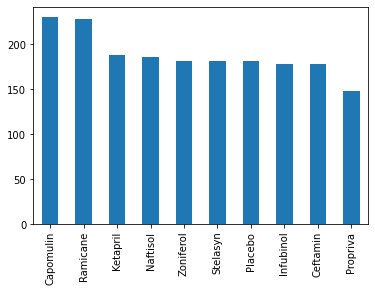

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_counts = cleaned_df['Drug Regimen'].value_counts()

drug_counts.plot(kind='bar')

<BarContainer object of 10 artists>

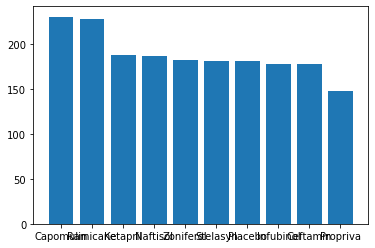

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(drug_counts.index.values, drug_counts.values)


<AxesSubplot:ylabel='Sex'>

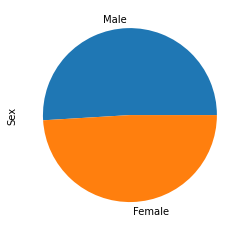

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts = cleaned_df['Sex'].value_counts()

sex_counts.plot(kind='pie')


([<matplotlib.patches.Wedge at 0x2c85f324470>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Males'),
  Text(0.033082014082615095, -1.0995024239828841, 'Females')])

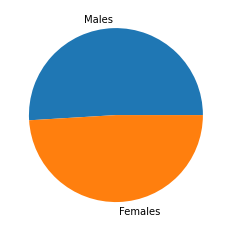

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#plt.pie(sex_counts.index.values)
# len(sex_counts['Male'].value_counts())
males = sex_counts['Male']
females = sex_counts['Female']
sexes = ['Males', 'Females']
sex_nums = [males, females]

plt.pie(sex_nums, labels=sexes)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
big_four = merged_data.loc[(merged_data['Drug Regimen'] == "Capomulin") | 
                          (merged_data['Drug Regimen'] == "Ramicane") |
                          (merged_data['Drug Regimen'] == "Infubinol") |
                          (merged_data['Drug Regimen'] == "Ceftamin"), :]

big_four.head()

# Start by getting the last (greatest) timepoint for each mouse

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = cleaned_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
latest_data = max_tumor.merge(cleaned_df,on=['Mouse ID','Timepoint'],how="left")
latest_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_list = []

# Capomulin_tumor_vol = []
# Ramicane_tumor_vol = []
# Infubinol_tumor_vol = []
# Ceftamin_tumor_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = latest_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3)s is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3)s is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

# Locate the rows which contain mice on each drug and get the tumor volumes

#bf_groups = pd.DataFrame(latest_data.groupby(['Drug Regimen'].value_counts())

#drug_index = latest_data.reset_index(['Drug Regimen'])
#drug_index = bf_groups.reindex(['Drug Regimen'])

for drug in treatments:
    tumor_vol = latest_data.loc[latest_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_volume_list.append(tumor_vol)

    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Tumor Volume (mm3) is: 45.87586684749999
The upper quartile of Tumor Volume (mm3)s is: 65.05362410500001
The interquartile range of Tumor Volume (mm3)s is: 19.17775725750002
The the median of Tumor Volume (mm3) is: 55.793278175 
Values below 17.109230961249963 could be outliers.
Values above 93.82025999125004 could be outliers.


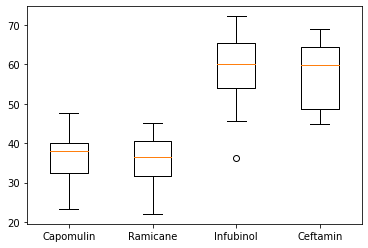

In [83]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume_list, labels=treatments)
plt.show()

## Line and Scatter Plots

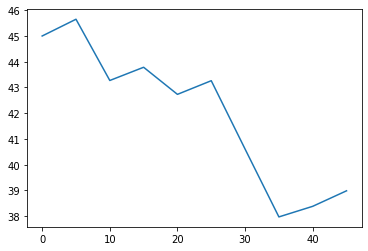

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
id_index = merged_data_id.set_index("Mouse ID")

mouse_id = 'b128'
individual_time = id_index.loc[mouse_id,["Timepoint"]]
individual_volume = id_index.loc[mouse_id,["Tumor Volume (mm3)"]]

plt.plot(individual_time, individual_volume, label="Tumor Volume Over Time")
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
